<a href="https://colab.research.google.com/github/akemiyamashita/pfneumonia/blob/master/VGG16japaneseChestXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 

import numpy as np # linear algebra
import glob,pylab,pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util import montage
from skimage.io import imread



In [0]:
ImageIndex = all_xray_df['ImageIndex'][0]
img_file = '../content/%s.png' % ImageIndex

In [0]:
all_xray_df = pd.read_csv('../content/label_test .csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'content',  '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['ImageIndex'].map(all_image_paths.get)

all_xray_df.head(3)

Scans found: 23 , Total Headers 13


,index,ImageIndex,sex,age,diseases,Target,path
0,1,34112701.png,1,84,GGO,1,../content/34112701.png
1,2,37062406.png,1,81,GGO,1,../content/37062406.png
2,3,37111060.png,0,81,drop,0,../content/37111060.png


In [0]:
all_xray_df.describe(include=['O'])

,ImageIndex,diseases,path
count,13,13,13
unique,13,4,13
top,34112701.png,GGO,../content/38022052.png
freq,1,9,1


In [0]:
all_xray_df['diseases'].value_counts()

GGO       9
normal    2
RGGO      1
drop      1
Name: diseases, dtype: int64

In [0]:
all_xray_df['diseases'] = all_xray_df['diseases'].map(lambda x: x.replace('normal', ''))
from itertools import chain

all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['diseases'].map(lambda finding: 1.0 if c_label in finding else 0)

All Labels (17): ['+', 'GGO', 'GGOall', 'LGGO', 'NO', 'PM', 'RGGO', 'Rdull', 'conslidation', 'drop', 'dull', 'fiblin', 'nodule', 'normai', 'sarco', 'tumor', 'water']


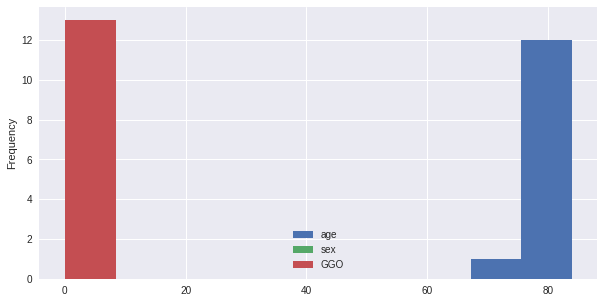

In [0]:
all_xray_df[['age', 'sex', 'GGO']].plot.hist(figsize = (10, 5))

In [0]:
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug 

    100% |████████████████████████████████| 7.0MB 6.4MB/s 
    100% |████████████████████████████████| 17.3MB 2.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


In [0]:
!unzip -o XP.zip

Archive:  XP.zip
  inflating: XP/34112701.png         
  inflating: XP/37062406.png         
  inflating: XP/37111060.png         
  inflating: XP/38010108.png         
  inflating: XP/38010205.png         
  inflating: XP/38022052.png         
  inflating: XP/38081005.png         
  inflating: XP/38081305.png         
  inflating: XP/39020758.png         
  inflating: XP/40041305.png         
  inflating: XP/42060605.png         
  inflating: XP/42082057.png         
  inflating: XP/43031061.png         


In [0]:
import os 
import sys

import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob 

In [0]:
!pip3 install -q kaggle

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2537            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9886            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4147            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         35           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2364           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
LANL-Ear

In [0]:
ROOT_DIR = os.path.abspath('../content')

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')

if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)
os.chdir(ROOT_DIR)

In [0]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

  0% 0.00/583k [00:00<?, ?B/s]
100% 583k/583k [00:00<00:00, 38.7MB/s]
  0% 0.00/155k [00:00<?, ?B/s]
100% 155k/155k [00:00<00:00, 71.9MB/s]
  0% 0.00/661k [00:00<?, ?B/s]
100% 661k/661k [00:00<00:00, 89.8MB/s]
100% 377M/377M [00:07<00:00, 68.0MB/s]
100% 377M/377M [00:07<00:00, 54.7MB/s]
100% 3.29G/3.29G [00:57<00:00, 69.2MB/s]
100% 3.29G/3.29G [00:57<00:00, 61.2MB/s]
  0% 0.00/55.0 [00:00<?, ?B/s]
100% 55.0/55.0 [00:00<00:00, 53.7kB/s]


In [0]:
!unzip -q -o stage_2_test_images.zip -d stage_2_test_images
!unzip -q -o stage_2_train_images.zip -d stage_2_train_images
!unzip -q -o stage_2_train_labels.csv.zip

In [0]:
%matplotlib inline
import numpy as np # linear algebra
import glob,pylab,pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util import montage
from skimage.io import imread
base_dir = os.path.join('..', '../content')
all_xray_df = pd.read_csv('stage_2_train_labels.csv')
all_xray_df.sample(5)

,patientId,x,y,width,height,Target
11934,7ae62f3e-f20c-4991-8d4d-cb0862bda103,NaN,NaN,NaN,NaN,0
8711,61afee15-8240-404d-b1a8-aa6e5581d038,NaN,NaN,NaN,NaN,0
13009,8375abca-b2a0-4d2f-8672-002f89276a4e,NaN,NaN,NaN,NaN,0
20040,b89e287f-5a3a-4f27-baf9-38759fed98cb,NaN,NaN,NaN,NaN,0
16130,9c6978ae-d8f5-4f39-8162-d6d5b105f3d9,NaN,NaN,NaN,NaN,0


In [0]:
patientId = all_xray_df['patientId'][0]
dcm_file = 'stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [0]:
all_xray_im = dcm_data.pixel_array
print(type(all_xray_im))
print(all_xray_im.dtype)
print(all_xray_im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

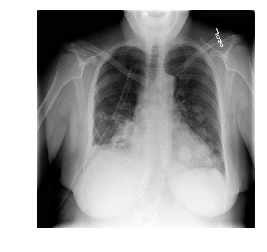

In [0]:
pylab.imshow(all_xray_im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [0]:
# params we will probably want to do some hyperparameter optimization later
BASE_MODEL= 'VGG16' # ['VGG16', 'RESNET52', 'InceptionV3', 'Xception', 'DenseNet169', 'DenseNet121']
IMG_SIZE = (384, 384) # [(224, 224), (384, 384), (512, 512), (640, 640)]
BATCH_SIZE = 24 # [1, 8, 16, 24]
DENSE_COUNT = 128 # [32, 64, 128, 256]
DROPOUT = 0.25 # [0, 0.25, 0.5]
LEARN_RATE = 1e-4 # [1e-4, 1e-3, 4e-3]
TRAIN_SAMPLES = 8000 # [3000, 6000, 15000]
TEST_SAMPLES = 800
USE_ATTN = False # [True, False]

In [0]:
image_bbox_df = pd.read_csv('image_bbox_full.csv')
image_bbox_df['path'] = image_bbox_df['path'].map(lambda x: 
                                                  x.replace('input', 
                                                            'content'))



print(image_bbox_df.shape[0], 'images')
image_bbox_df.sample(3)

30227 images


,patientId,x,y,width,height,Target,class,boxes,path
23290,c7cc27a7-fb05-494c-8f45-173dba214d4b,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,1,../content/stage_2_train_images/c7cc27a7-fb05-...
7453,4dcc0124-ba1e-49d7-a08b-8c2f23cf4bd1,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,1,../content/stage_2_train_images/4dcc0124-ba1e-...
14508,86746808-b97b-4a47-b073-973fa4babd3f,NaN,NaN,NaN,NaN,0,Normal,1,../content/stage_2_train_images/86746808-b97b-...


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
class_enc = LabelEncoder()
image_bbox_df['class_idx'] = class_enc.fit_transform(image_bbox_df['class'])
oh_enc = OneHotEncoder(sparse=False)
image_bbox_df['class_vec'] = oh_enc.fit_transform(
    image_bbox_df['class_idx'].values.reshape(-1, 1)).tolist() 
image_bbox_df.sample(3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,patientId,x,y,width,height,Target,class,boxes,path,class_idx,class_vec
6473,45e18056-b7eb-4477-8eeb-7b740b61e093,593.0,159.0,254.0,390.0,1,Lung Opacity,2,../content/stage_2_train_images/45e18056-b7eb-...,0,"[1.0, 0.0, 0.0]"
18716,a78391ab-082e-4dd6-a672-897866dbf2fb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,1,../content/stage_2_train_images/a78391ab-082e-...,1,"[0.0, 1.0, 0.0]"
25629,db32f09d-b7f5-424b-a393-a10cab691038,348.0,556.0,96.0,148.0,1,Lung Opacity,1,../content/stage_2_train_images/db32f09d-b7f5-...,0,"[1.0, 0.0, 0.0]"


In [0]:
from sklearn.model_selection import train_test_split
image_df = image_bbox_df.groupby('patientId').apply(lambda x: x.sample(1))
raw_train_df, valid_df = train_test_split(image_df, test_size=0.25, random_state=2018,
                                    stratify=image_df['class'])
print(raw_train_df.shape, 'training data')
print(valid_df.shape, 'validation data')

(20013, 11) training data
(6671, 11) validation data


7998 new training size


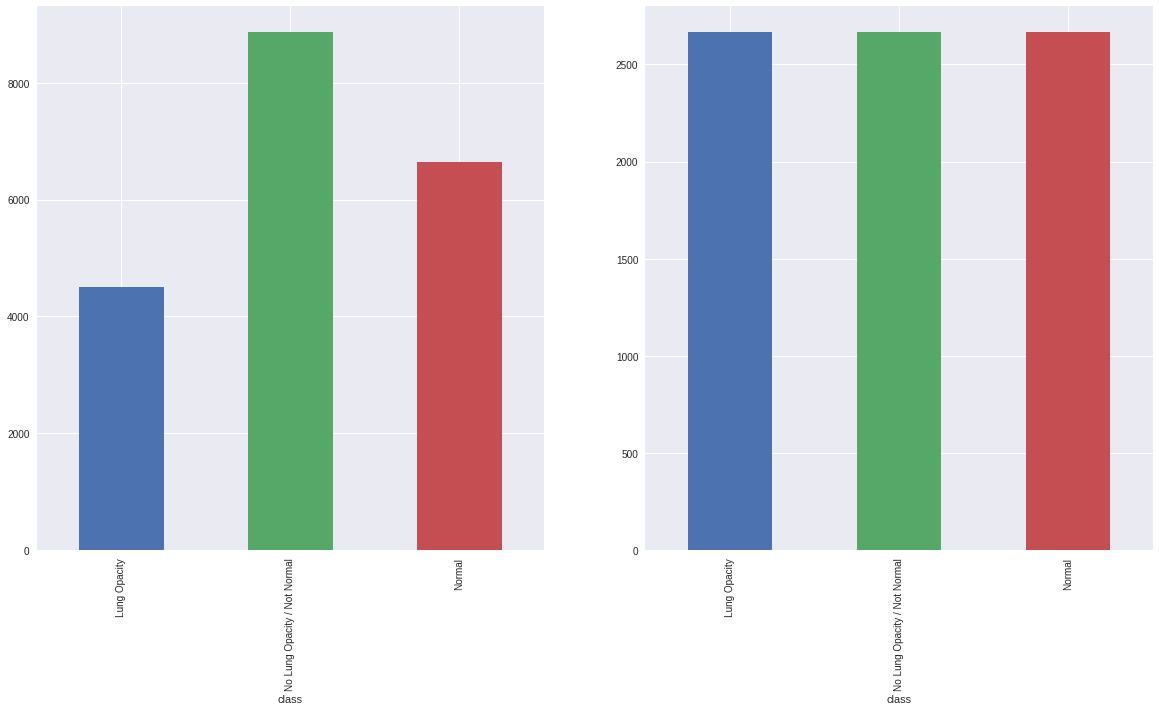

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
raw_train_df.groupby('class').size().plot.bar(ax=ax1)
train_df = raw_train_df.groupby('class').\
    apply(lambda x: x.sample(TRAIN_SAMPLES//3)).\
    reset_index(drop=True)
train_df.groupby('class').size().plot.bar(ax=ax2) 
print(train_df.shape[0], 'new training size')

In [0]:
import keras
print(keras.__version__)

2.2.4


In [0]:

import keras_preprocessing.image as KPImage
from keras_preprocessing import image
    
from PIL import Image
import pydicom
def read_dicom_image(in_path):
    img_arr = pydicom.read_file(in_path).pixel_array
    return img_arr/img_arr.max()
    
class medical_pil():
    @staticmethod
    def open(in_path):
        if '.dcm' in in_path:
            c_slice = read_dicom_image(in_path)
            int_slice =  (255*c_slice).clip(0, 255).astype(np.uint8) # 8bit images are more friendly
            return Image.fromarray(int_slice)
        else:
            return Image.open(in_path)
    fromarray = Image.fromarray
KPImage.pil_image = medical_pil

In [0]:
from keras.preprocessing.image import ImageDataGenerator
if BASE_MODEL=='VGG16':
    from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
elif BASE_MODEL=='RESNET52':
    from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input
elif BASE_MODEL=='InceptionV3':
    from keras.applications.inception_v3 import InceptionV3 as PTModel, preprocess_input
elif BASE_MODEL=='Xception':
    from keras.applications.xception import Xception as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet169': 
    from keras.applications.densenet import DenseNet169 as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet121':
    from keras.applications.densenet import DenseNet121 as PTModel, preprocess_input
else:
    raise ValueError('Unknown model: {}'.format(BASE_MODEL))

In [0]:

img_gen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=3,
    width_shift_range=0.02,
    height_shift_range=0.05,
    horizontal_flip=True)


In [0]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, seed = None, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways: seed: {}'.format(seed))
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                              seed = seed,
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values,0)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen
  


In [0]:


train_gen=flow_from_dataframe(img_gen, train_df,
y_col='class_vec',
path_col='path',
batch_size=BATCH_SIZE,
color_mode='rgb')



## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 7998 images


In [0]:
train_gen = flow_from_dataframe(img_gen, train_df, 
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = BATCH_SIZE)

valid_gen = flow_from_dataframe(img_gen, valid_df, 
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
valid_X, valid_Y = next(flow_from_dataframe(img_gen, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = TEST_SAMPLES)) # one big batch




## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 7998 images
## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 6671 images
## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 6671 images


OSError: ignored

In [0]:
t_x, t_y =next(train_gen)
print(t_x.shape, t_y.shape)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap=pylab.cm.gist_gray)
    c_ax.set_title('%s' % class_enc.classes_[np.argmax(c_y)])
    c_ax.axis('off')

TypeError: ignored

In [0]:
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

NameError: ignored